# Workshop 1 (Follow Along)
#### AI Academy
***
## Getting to Know Juptyer and Dataframes
Follow along the following to learn how to use Jupyter notebooks, and the Pandas library.

For a quickstart for Jupyter, check out [this tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) (you can skip the installation instructions) and [these shortcuts](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/),  or Google around to find your own tips.

The most important thing to know is Jupyter has 2 modes: an editing mode when you're editing a cell (green cell outline), and a command mode (blue cell outline). Editing directly edits the cell's contents, but when in insert mode, keys execute commands, like adding/moving/deleting cells. Enter enters editing mode and Ctrl+Enter or Shift+Enter exits it.

**Why Jupyter?** Jupyter notebooks are becoming a standard for data science because they allow you to save not only your code, but also your output (results, visualizations, etc.), and documentation through [markdown](https://www.markdownguide.org/cheat-sheet/).

## Loading Data (20 mins)

In [2]:
# These libraries will be used on most assignments
# Pandas helps us manage data in a tabular dataframe
import pandas as pd
# Numpy helps with math and stats functions
import numpy as np
# Matplot helps with plotting
import matplotlib.pyplot as plt
%matplotlib inline
# Remember you have to run this cell block before continuing!

In [3]:
# We'll also use sklearn for a lot of ML functions.
# In this case, we're loading the Iris dataset from the sklearn.datasets library
from sklearn import datasets
iris_sk = datasets.load_iris(as_frame=True) # Load the dataset
# We convert it to a Pandas dataframe, which will be easier to work with
iris = pd.DataFrame(iris_sk.data, columns=iris_sk.feature_names)
# Remember, if a Jupyter cell ends with an expression (or assignment), it will print it.
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


**Tip**: In practice, you'll be loading data from .csv files. You can do this in Pandas with the following code.
Note that `/etc/` is a public, read-only directly on this server and may not exist if you work on your own computer. That's why we'll often use sklearn's datasets.

In [4]:
iris_from_file = pd.read_csv('./iris.csv')
# the head() function prints the first [n=5] rows of the dataset
iris_from_file.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Subsetting data

In this section, you'll do some practice problems to manipulate data. I recommend reading up on the Pandas library, and practicing Googling key terms. Seriously, using these libraries involves a lot of searching - even for your professor :)

**Tip**: It might help to create a new cell and experiment with function calls before trying to write the answer. This can be done in command mode with the A (above) or B (below) keys.

### Data Shape
The way data is arranged is called it's "shape". Right now since we're viewing a table of data, the current shape of the data is two dimensional.

In [4]:
iris.shape

(150, 4)

The first dimension is the number of rows (objects)

In [5]:
iris.shape[0]

150

The second dimension is the number of columns (attributes)

In [6]:
iris.shape[1]

4

### Getting Columns (Attributes) and Rows
Now check out [this documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) 
on how to get rows and columns of dataframes in Pandas.

And check out these examples

In [7]:
# Get the 4th row of the data (it's 0-indexed)
iris.iloc[3,]

sepal length (cm)    4.6
sepal width (cm)     3.1
petal length (cm)    1.5
petal width (cm)     0.2
Name: 3, dtype: float64

In [8]:
# Get the 2nd column (use : to indicate all rows)
iris.iloc[:,1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [9]:
# Get the "sepal length (cm)" column
# notice the use of "loc" and not "iloc" for string keys
iris.loc[:,"sepal length (cm)"]
# For columns, you can use this shorter notation
iris["sepal length (cm)"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [10]:
# You can subset rows and columns at the same time
iris.loc[1:5:,"sepal length (cm)"]

1    4.9
2    4.7
3    4.6
4    5.0
5    5.4
Name: sepal length (cm), dtype: float64

### Basic Aggregation
A dataframe column is just like a list, so you can perform all your favorite list operations on them.

In [11]:
sum(iris['sepal length (cm)'])

876.5000000000002

In [12]:
np.prod(iris['sepal width (cm)'])

1.3906181028248847e+72

### Other ways to subset data

In [13]:
# Get the first 20 rows of the sepal length column
iris.loc[1:20, 'sepal length (cm)']

1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
Name: sepal length (cm), dtype: float64

In [14]:
# You can use this boolean vector to subset the rows you want
# This gets only the rows of iris with sepal length > 5
iris.loc[iris['sepal length (cm)'] > 5,]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
5,5.4,3.9,1.7,0.4
10,5.4,3.7,1.5,0.2
14,5.8,4.0,1.2,0.2
15,5.7,4.4,1.5,0.4
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
# For subsetting operations like that above, you can also use this shorthand 
# It ditches the '.loc' and needed to use a comma or ':' to specifiy the entire column
iris[iris['sepal length (cm)']>5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
5,5.4,3.9,1.7,0.4
10,5.4,3.7,1.5,0.2
14,5.8,4.0,1.2,0.2
15,5.7,4.4,1.5,0.4
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
# Another example, finding flowers where the petal length is 5 (don't forget the two ==)!
iris[iris['petal length (cm)'] == 5.0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
77,6.7,3.0,5.0,1.7
113,5.7,2.5,5.0,2.0
119,6.0,2.2,5.0,1.5
146,6.3,2.5,5.0,1.9


### Follow Along Problem 1
Count the number of rows in the iris dataset where the petal length is greater than 4

**Hint**: When you perform a *sum* operation on a list of boolean variables, it treates *True* as 1 and *False* as 0.

In [17]:
# Example of summing over a boolean list
sum([True, False, True, True])

3

In [18]:
# Write code here
petal_length_count = None
print(petal_length_count)

None


In [19]:
assert(petal_length_count == 84)

AssertionError: 

## Plotting Data
We can also plot data from the iris dataframe using matplotlib.

Text(0, 0.5, 'petal length (cm)')

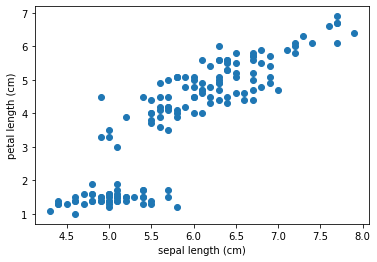

In [5]:
# Here's a scatter plot of the sepal and petal length attributes
plt.scatter(iris['sepal length (cm)'], iris['petal length (cm)'])
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")

Text(0.5, 0, 'petal length (cm)')

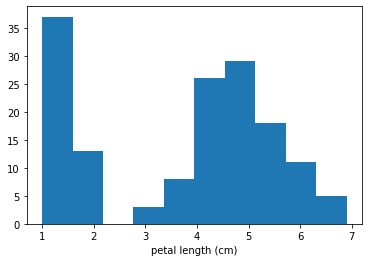

In [6]:
# Here is a histogram
plt.hist(iris["petal length (cm)"])
plt.xlabel("petal length (cm)")

# Workshop 1 (Group)

## Question 1: Dataframes (20 mins)
For this question, you'll be manipulating some data on your own from the iris dataset.

In [8]:
# Don't forget your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Remember you have to run this cell block before continuing!

### Q1.1
Load ```./iris.csv``` into a dataframe called ```iris```

In [9]:
# Load in here
iris = pd.read_csv("iris.csv") # Replace "None" with your answer

# If the last line of a cell is an expression (like `iris`),
# Jupyter prints it out below!
# Now inspect the dataframe you loaded
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### Q1.2
Create a subset of the **first 20 *Virginica* flowers** in the dataset. Call this subset `first_20`

In [10]:
# Put Solution Here (Remember to replace the "None" with your answer)
first_20 = iris[iris['variety'].isin(['Virginica'])].iloc[0:20]

first_20

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
100,6.3,3.3,6.0,2.5,Virginica
101,5.8,2.7,5.1,1.9,Virginica
102,7.1,3.0,5.9,2.1,Virginica
103,6.3,2.9,5.6,1.8,Virginica
104,6.5,3.0,5.8,2.2,Virginica
105,7.6,3.0,6.6,2.1,Virginica
106,4.9,2.5,4.5,1.7,Virginica
107,7.3,2.9,6.3,1.8,Virginica
108,6.7,2.5,5.8,1.8,Virginica
109,7.2,3.6,6.1,2.5,Virginica


In [11]:
# If this passes without fail, you (probably) selected the data right!
# It asserts that the number of rows with petal length > 5.3 is 12
# (Here the sum of a true/false statement "length > 5.3" is a count)
assert(sum(first_20["petal length (cm)"] > 5.3)==12)

Now plot a **scatterplot** of this *subset* that shows **"Sepal Width"** on the x-axis **"Petal Width"** on the y-axis

Text(0, 0.5, 'petal length (cm)')

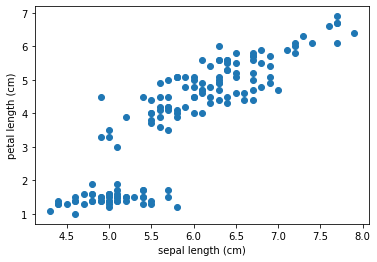

In [12]:
# Plot the scatterplot here using first_20!
plt.scatter(iris['sepal length (cm)'], iris['petal length (cm)'])
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")

## Q1.3
Plot a **histogram** that shows the distribution **Petal Length** on the **last 10 Setosa flowers** in the dataset. You should also write **test cases** to check your work!

Similar to the last question, call the subset of data `last_10`

In [14]:
#Put Solution here

last_10 = iris[iris['variety'].isin(['Setosa'])].iloc[-10:]


In [15]:
# If this passes without fail, you (probably) selected the data right!

assert(sum(last_10["petal width (cm)"] > 0.2)==5)

In [17]:
# Write your own test cases here using "assert" that test
# that 1) the number of rows in the dataset is equal to 10
# and 2) all of them have the class "Setosa"
print(last_10)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
40                5.0               3.5                1.3               0.3   
41                4.5               2.3                1.3               0.3   
42                4.4               3.2                1.3               0.2   
43                5.0               3.5                1.6               0.6   
44                5.1               3.8                1.9               0.4   
45                4.8               3.0                1.4               0.3   
46                5.1               3.8                1.6               0.2   
47                4.6               3.2                1.4               0.2   
48                5.3               3.7                1.5               0.2   
49                5.0               3.3                1.4               0.2   

   variety  
40  Setosa  
41  Setosa  
42  Setosa  
43  Setosa  
44  Setosa  
45  Setosa  
46  Setosa  
47  Setosa  
48

(array([[0., 0., 0., 0., 0., 0., 0., 1., 3., 6.],
        [0., 0., 1., 0., 3., 3., 3., 0., 0., 0.],
        [9., 1., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([1.3, 1.7, 2.1, 2.5, 2.9, 3.3, 3.7, 4.1, 4.5, 4.9, 5.3]),
 <a list of 3 BarContainer objects>)

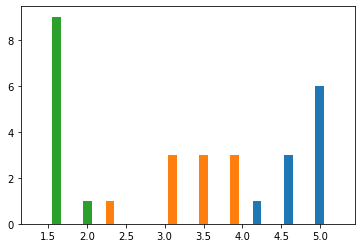

In [16]:
# Finally, plot the histogram here!
plt.hist(last_10.iloc[:,0:3])

***
# Numpy Matrix-Vector Refresher (20 mins)

Here's some recap on some basic numpy math operations. The instructor can also go over some examples by hand on the board if needed.

In [ ]:
# You've already used numpy extensively in your previous assignments.
# Here, we provide a few examples to show how easily you can 
# perform matrix operations in numpy without needing to use loops.
# imagine you're given two arrays toy_x and toy_y
toy_x = np.array([
    [1, 2], 
    [3, 4]
])
toy_y = np.array([
    [5, 6], 
    [7, 8]
])

print(f'toy_x looks like this \n{toy_x}\ntoy_y looks like this \n{toy_y}')

In [ ]:
# Element-wise addition
# Imagine you wish to sum each element of toy_x and toy_y 
# In traditional programming, you'd write two loops to sum each
# element in toy_x with each element in toy_y.
# Using numpy, you can simply use np.add()
element_wise_sum = np.add(toy_x, toy_y)
print(f'Element wise sum of toy_x and toy_y is \n{element_wise_sum}')

In [ ]:
# Note that using '+' will produce the same result
element_wise_sum = toy_x + toy_y
print(f'Element wise sum of toy_x and toy_y is \n{element_wise_sum}')

In [ ]:
# Similarly element-wise multiplication
element_wise_multiplication = np.multiply(toy_x, toy_y)
print(f'Element wise multiplication of toy_x and toy_y is \n{element_wise_multiplication}')

In [ ]:
# Note that using '*' will produce the same result
element_wise_multiplication = toy_x * toy_y
print(f'Element wise multiplication of toy_x and toy_y is \n{element_wise_multiplication}')

In [ ]:
# You can do this with other functions too! 
# Play around with methods such as np.sqrt, np.square, np.exp, etc. 

# The dot product is another useful function, which takes in arrays (not matrices)
dot_product = np.dot(toy_x[0], toy_y[0])
print(f'Dot product of the first rows of toy_x and toy_y is \n{dot_product}')

In [ ]:
# IMPORTANT
# Note the difference between element-wise multiplication and 
# matrix multiplication
# To perform matrix multiplication, you can use np.matmul
matrix_multiplication = np.matmul(toy_x, toy_y)
print(f'Matrix multiplication between toy_x and toy_y is \n{matrix_multiplication}')

***
## Question 2: Numpy, Vectors, and Matrices (10 mins)
In this questions, you'll be working with vectors an matracies.

### Q2.1
When we talk about neural networks, you'll often see them represented as a vector multiplied by a matrix, in the form:

$\mathbf{y} = W \mathbf{a}$

Where $\mathbf{a}$ is an input vector of attributes, and $\mathbf{W}$ is a matrix of "weights" (i.e. numbers). 

(You don't need to know about neural nets right now, we'll talk more about them later)

You can go [here for a quick refresher on Matrix multiplication](https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:matrices/x9e81a4f98389efdf:multiplying-matrices-by-matrices/a/multiplying-matrices).

As an example, given the problem:

$y = \begin{bmatrix} 3 & 2 \\ 1 & -2 \end{bmatrix} \begin{bmatrix} 5 \\ 6 \end{bmatrix}$

The answer would be:

$y = \begin{bmatrix} 3 * 5 + 2 * 6  \\ 1 * 5 + (-2) * 6  \end{bmatrix} = \begin{bmatrix} 27  \\ -7  \end{bmatrix}$

**Now, consider the problem:**

$y = \begin{bmatrix} 1 & 2 \\ 4 & 5 \\ 9 & 3 \end{bmatrix} \begin{bmatrix} 7 \\ 3 \end{bmatrix}$

First, **compute the correct solution by hand**, and then **verify it is correct by using numpy**.

In [20]:
# Put Solution Here
toy_x = np.array([
    [1, 2], 
    [4, 5],
    [9, 3]
])
toy_y = np.array([
    [7], 
    [3]
])
matrix_multiplication = np.matmul(toy_x, toy_y)
print(f'Matrix multiplication between toy_x and toy_y is \n{matrix_multiplication}')

Matrix multiplication between toy_x and toy_y is 
[[13]
 [43]
 [72]]


### Q2.1

Consider the matricies 

$L = \begin{bmatrix} 1 & 11 \\ 11 & 12 \end{bmatrix}$, $U=\begin{bmatrix} 16 & 71 \\ 22 & 5 \end{bmatrix}$

Calculate:

1) Element-wise multiplication of $L$ and $U$


2) Element-wise addition of $L$ and $U$

3) $U^2$

4) $UL$ (matrix multiplication, **NOT** element wise multiplication)

5) $LU$ (matrix multiplication, **NOT** element wise multiplication)


In [21]:
# Define the matracies
toy_x = np.array([
    [1, 11], 
    [11, 12]
])
toy_y = np.array([
    [7, 71], 
    [22, 5]
])

In [23]:
# Problem 1
element_wise_multiplication = np.multiply(toy_x, toy_y)
print(f'Element wise multiplication of toy_x and toy_y is \n{element_wise_multiplication}')

Element wise multiplication of toy_x and toy_y is 
[[  7 781]
 [242  60]]


In [24]:
# Problem 2
element_wise_sum = np.add(toy_x, toy_y)
print(f'Element wise sum of toy_x and toy_y is \n{element_wise_sum}')


Element wise sum of toy_x and toy_y is 
[[ 8 82]
 [33 17]]


In [26]:
# Problem 3
element_wise_sum = np.square(toy_x, toy_y)
print(f'Element wise square of toy_x and toy_y is \n{element_wise_sum}')

Element wise square of toy_x and toy_y is 
[[  1 121]
 [121 144]]


In [27]:
# Problem 4
matrix_multiplication = np.matmul(toy_x, toy_y)
print(f'Matrix multiplication between toy_x and toy_y is \n{matrix_multiplication}')

Matrix multiplication between toy_x and toy_y is 
[[1332 1705]
 [1463 3059]]


In [28]:
# Problem 5
matrix_multiplication = np.matmul(toy_y, toy_x)
print(f'Matrix multiplication between toy_x and toy_y is \n{matrix_multiplication}')

Matrix multiplication between toy_x and toy_y is 
[[1332 1463]
 [1705 3059]]


***
## Question 3: Z-scores (If time allows) (15 mins)
In this questions, you'll be implementing a function yourself to calculate the z-scores of a list of numbers.

Remember the z-score $z_i$ for a given attribute value $x_i$ is:


$$ z_i = \frac{x_i-\mu}{\sigma}$$

Where:

$\mu =$ sample mean

$x_i =$ observed value

$\sigma =$ sample standard deviation


**Helpful functions**:

`np.mean(X)`: the mean of a list of numbers

`np.std(X)`: the standard deviate of a list of numbers

In [29]:
nums = [12,3,9,7,14,2]

In [33]:
def z_score(data):
    zscore = (data- np.mean(data))/np.std(data)
        
    return zscore

In [34]:
final_scores = z_score(nums)

In [35]:
# Check if you got it right
assert(final_scores[0] == 0.9524241471993242)
assert(final_scores[1] == -1.1048120107512158)

In [36]:
print(final_scores[0], final_scores[1])

0.9524241471993242 -1.1048120107512158
